# HR Analytics Project- Understanding the Attrition in HR

In [12]:
#Importing necessary Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [13]:
df = pd.read_csv('HR_analytics.csv')
df


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


We can see there are 35 features including the target column. Here "Attrition" is the target column classifying as Yes/No. Hence it is a Classification problem Statement.

# EDA

In [14]:
#checking the columns of this dataset
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [16]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

There are total 9 object datatype column and 26 int64 datatype column.
Columns - 'Attrition', 'BusinessTravel','Department','EducationField','Gender','MaritalStatus ','JobRole','Over18','OverTime' are the columns having categorical data. And rest all columns are of int datatype.

In [17]:
# Checking the null values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

There is no missing value present in this dataset.

In [18]:
#Dropping the irrelavant Columns as they do not contribute anything for the prediction
df =df.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours'],axis=1)
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,3,4,0,17,3,2,9,6,0,8


In [19]:
# Checking for Numerical and Categorical data
numeric_col = df.select_dtypes(include=[np.number]).columns
categorical_col = df.select_dtypes(include=[np.object]).columns
print("Numerical features are:",numeric_col)
print("Categorical features are:",categorical_col)

Numerical features are: Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')
Categorical features are: Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')


# Data Visualization

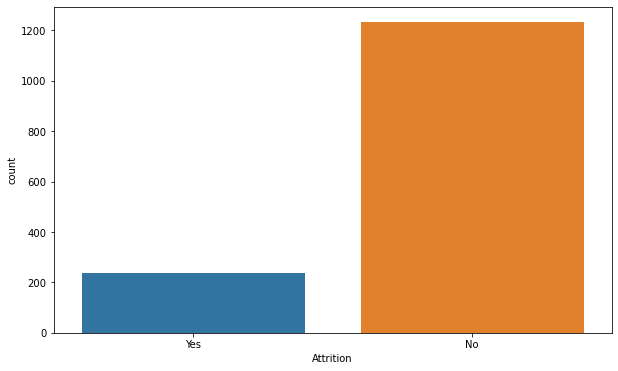

In [20]:
#lets see our target variable
plt.figure(figsize=(10,6))
sns.countplot(df['Attrition'])
plt.show()

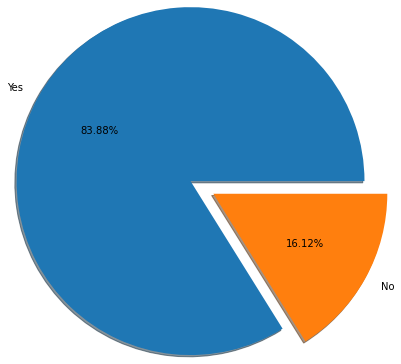

In [21]:
labels = 'Yes','No',
fig, ax = plt.subplots()
ax.pie(df['Attrition'].value_counts(),labels = labels,radius =2,autopct = '%2.2f%%',explode=[0.1,0.2], shadow=True,)
plt.show()

look like our dataset is imbalabanced we have to treat it so that to keep our model unbiased

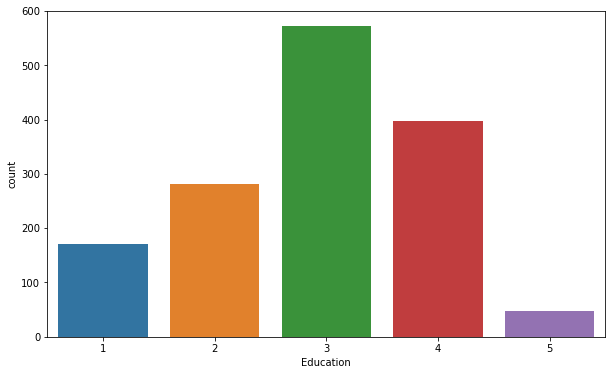

In [23]:
plt.figure(figsize=(10,6))
sns.countplot(df['Education'])
plt.show()

We can infer that majority of the Employees of the organization persued level 3 and 4 Education.

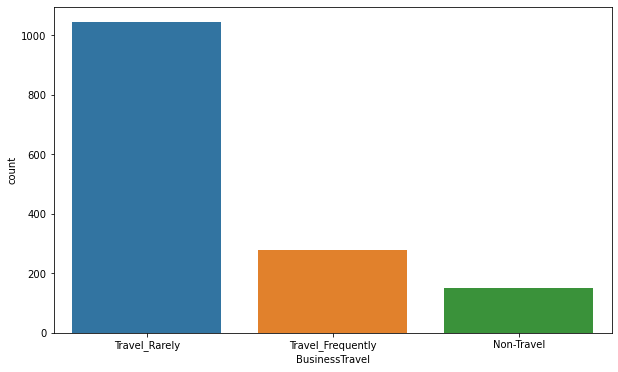

In [24]:
plt.figure(figsize=(10,6))
sns.countplot(df['BusinessTravel'])
plt.show()

We can visualize that majority of the Employees have Rarely travelled history

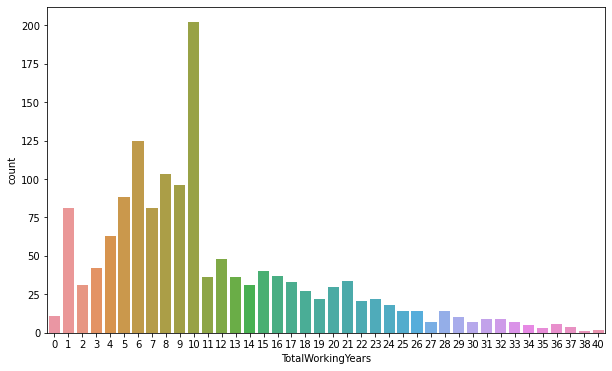

In [25]:

plt.figure(figsize=(10,6))
sns.countplot(df['TotalWorkingYears'])
plt.show()

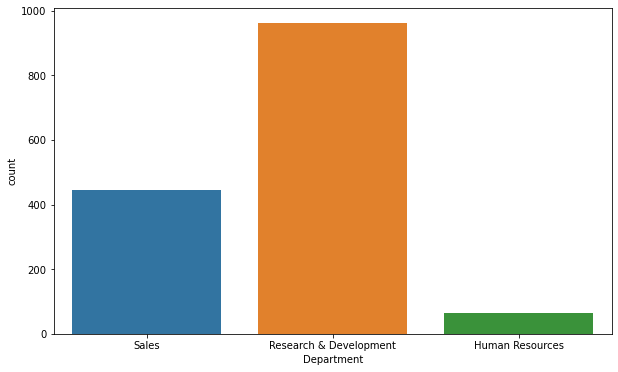

In [26]:
plt.figure(figsize=(10,6))
sns.countplot(df['Department'])
plt.show()

The above visualization clears that the majority employees are from Research & Development Department, foloowed by Sales. whereas There are very few employees with department HR.

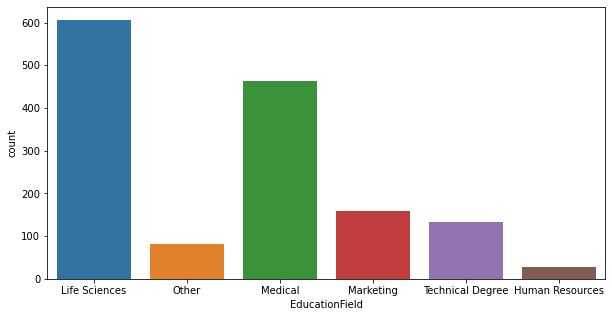

In [27]:
plt.figure(figsize=(10,5))
sns.countplot(df['EducationField'])
plt.show()


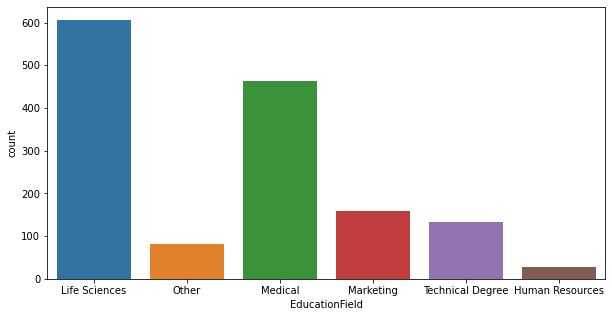

In [28]:
plt.figure(figsize=(10,5))
sns.countplot(df['EducationField'])
plt.show()


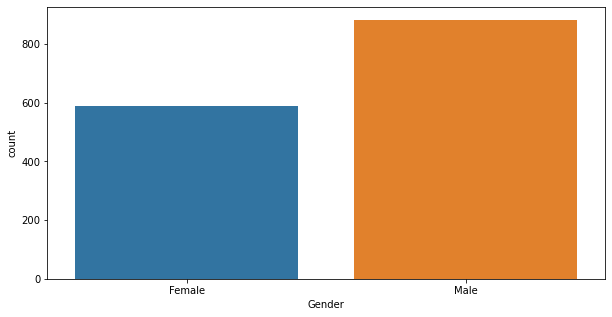

In [29]:
plt.figure(figsize=(10,5))
sns.countplot(df['Gender'])
plt.show()

The count of Male Employees in the organization is mre than female

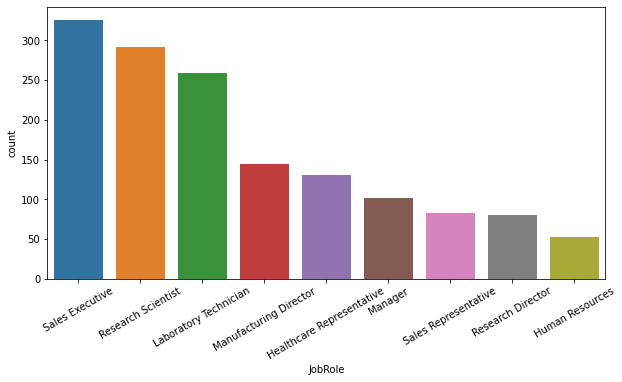

In [31]:

plt.figure(figsize=(10,5))
plt.xticks(rotation=30)
sns.countplot(df['JobRole'])
plt.show()

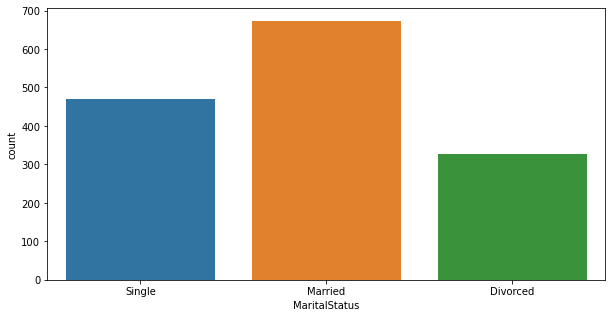

In [32]:

plt.figure(figsize=(10,5))
sns.countplot(df['MaritalStatus'])
plt.show()

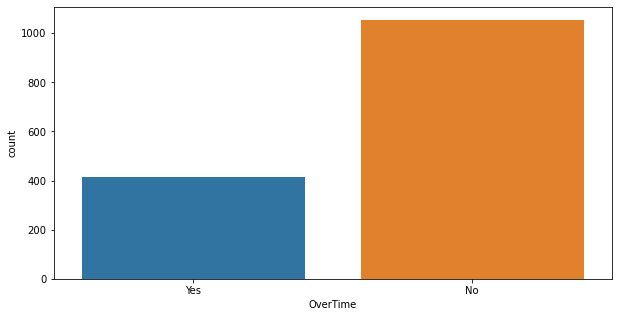

In [33]:
plt.figure(figsize=(10,5))
sns.countplot(df['OverTime'])
plt.show()

Few of them have done overttime

<AxesSubplot:xlabel='Age', ylabel='count'>

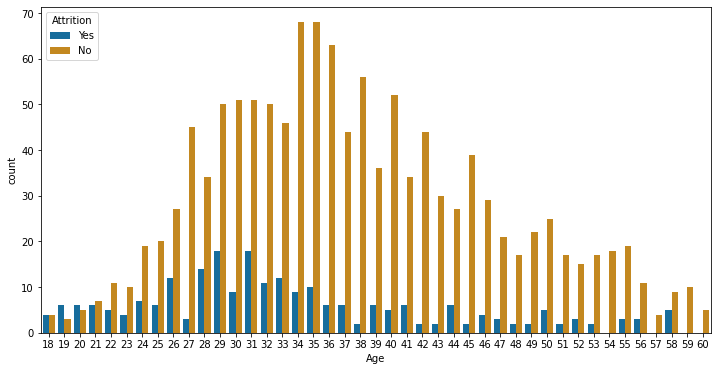

In [40]:
plt.figure(figsize=(12,6))
sns.countplot(x='Age', hue = 'Attrition', palette = 'colorblind',data =df )

For the age 19&21, employees attrited from the company is higher than retention. Also Employees of the age 29&31 are attrited most

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Sales Executive'),
  Text(1, 0, 'Research Scientist'),
  Text(2, 0, 'Laboratory Technician'),
  Text(3, 0, 'Manufacturing Director'),
  Text(4, 0, 'Healthcare Representative'),
  Text(5, 0, 'Manager'),
  Text(6, 0, 'Sales Representative'),
  Text(7, 0, 'Research Director'),
  Text(8, 0, 'Human Resources')])

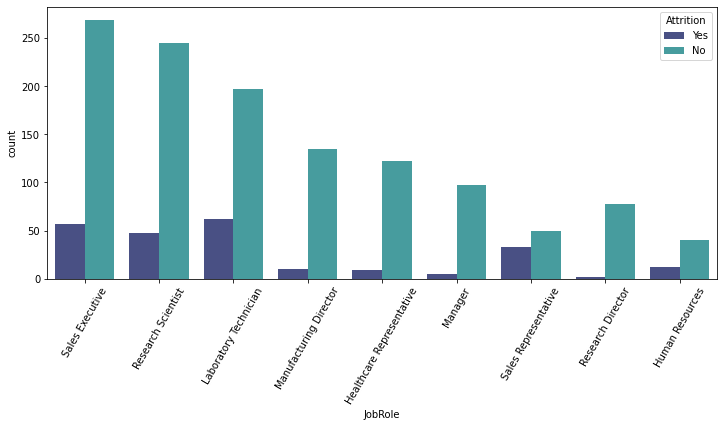

In [44]:
plt.figure(figsize=(12,5))
sns.countplot(x='JobRole', hue = 'Attrition', palette = 'mako',data =df )
plt.xticks(rotation = 60)

research scientist & Sales Executives are highest attrited

<AxesSubplot:xlabel='JobSatisfaction', ylabel='count'>

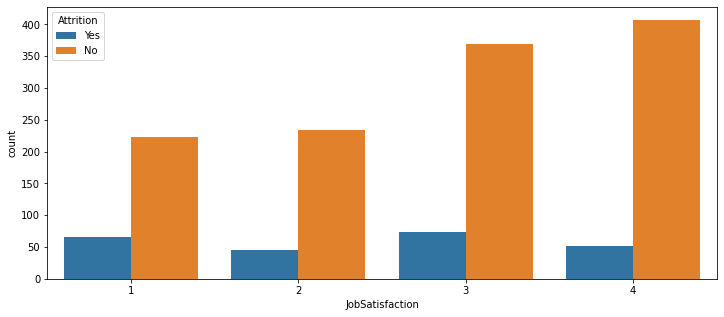

In [46]:
plt.figure(figsize=(12,5))
sns.countplot(x='JobSatisfaction', hue = 'Attrition',data =df )

Employees with jobsatisfaction of point 1 and 3 are attrited more

<AxesSubplot:xlabel='NumCompaniesWorked', ylabel='count'>

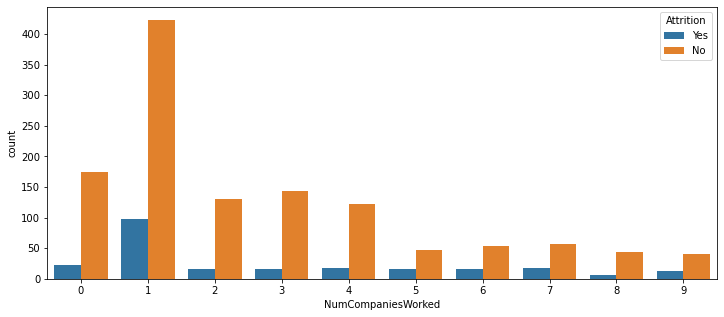

In [47]:
plt.figure(figsize=(12,5))
sns.countplot(x='NumCompaniesWorked', hue = 'Attrition',data =df )

Employees who has worked with only one companies are attributed

<AxesSubplot:xlabel='OverTime', ylabel='count'>

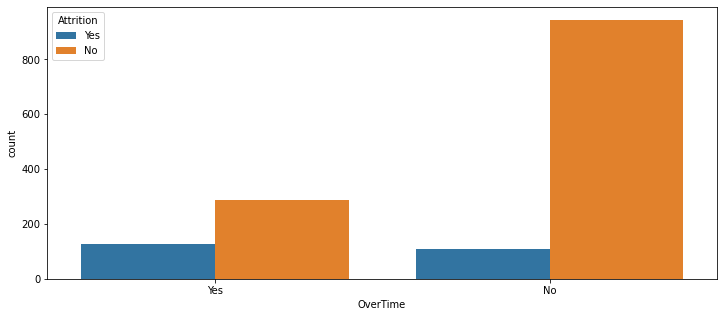

In [48]:
plt.figure(figsize=(12,5))
sns.countplot(x='OverTime', hue = 'Attrition',data =df )

Employee from both categories are attrited somewhat equally

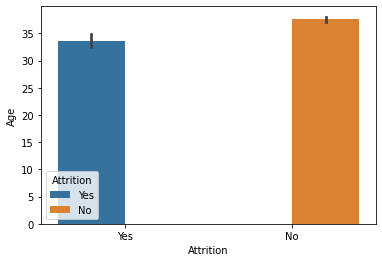

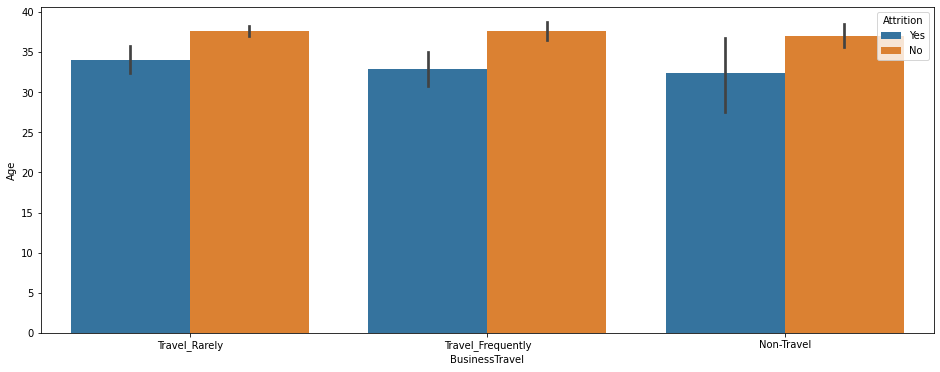

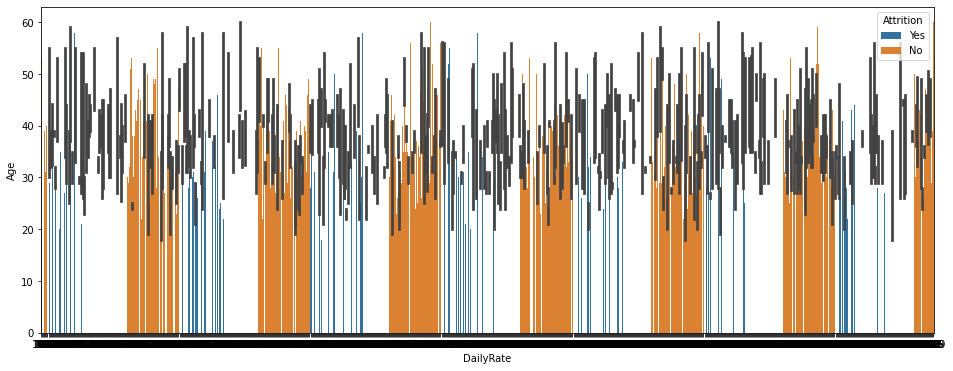

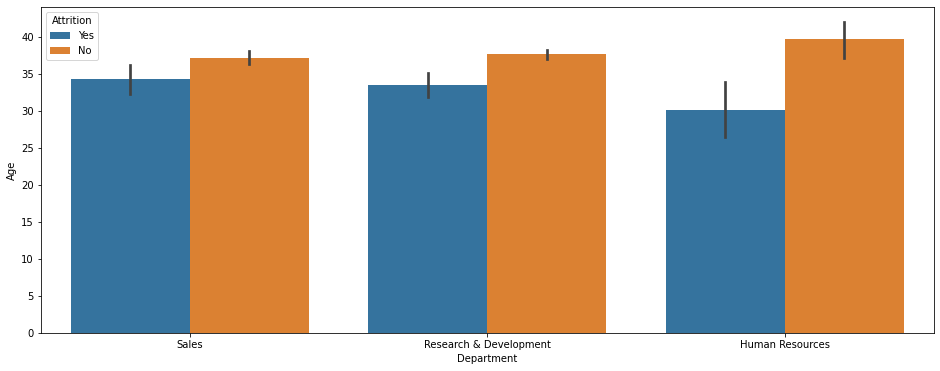

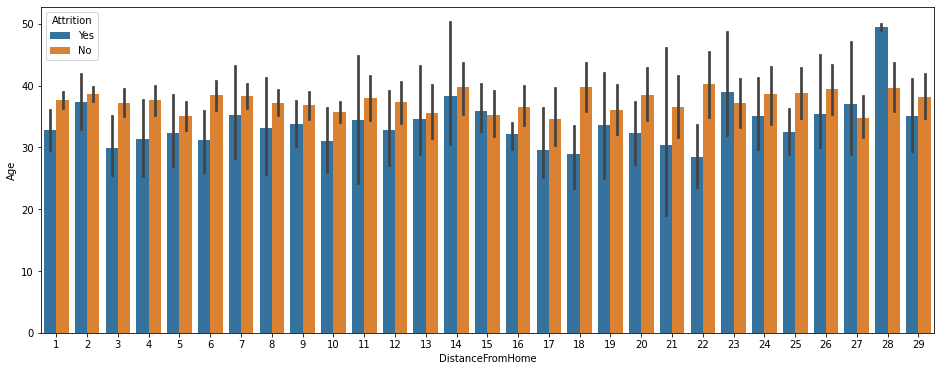

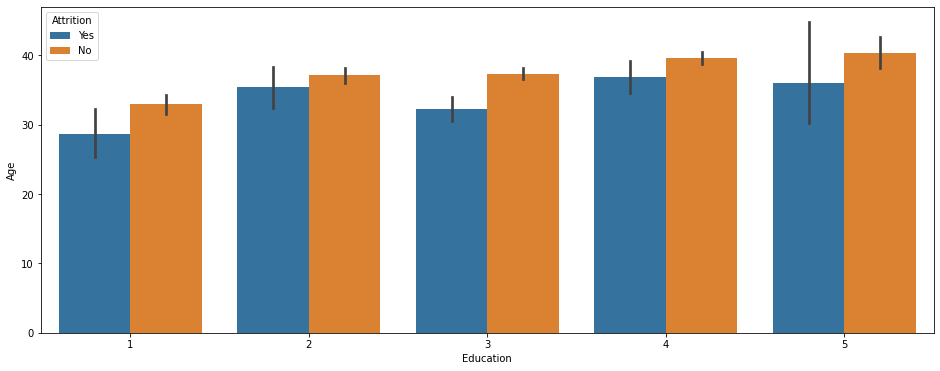

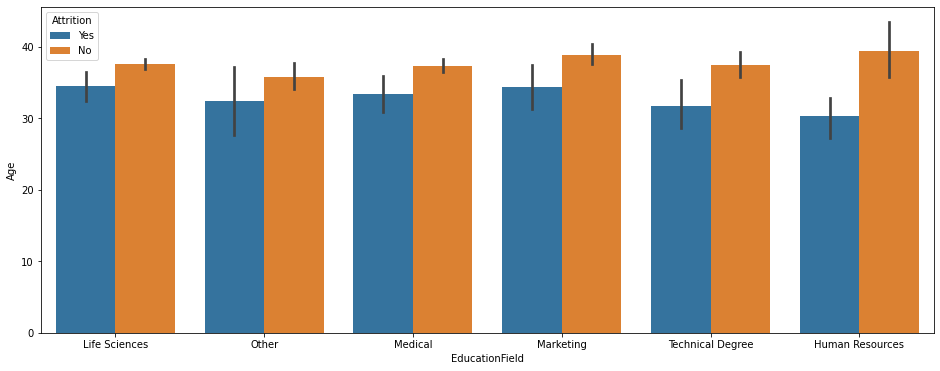

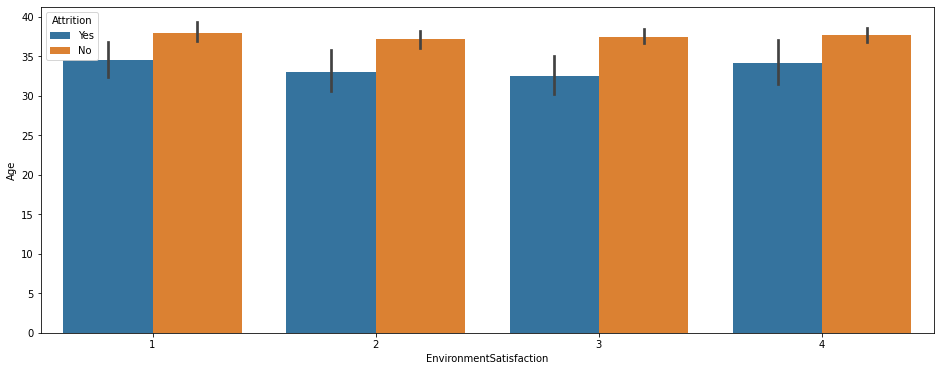

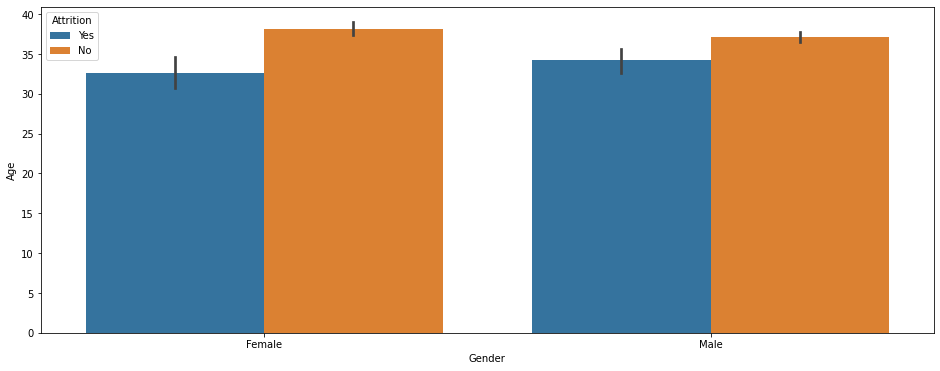

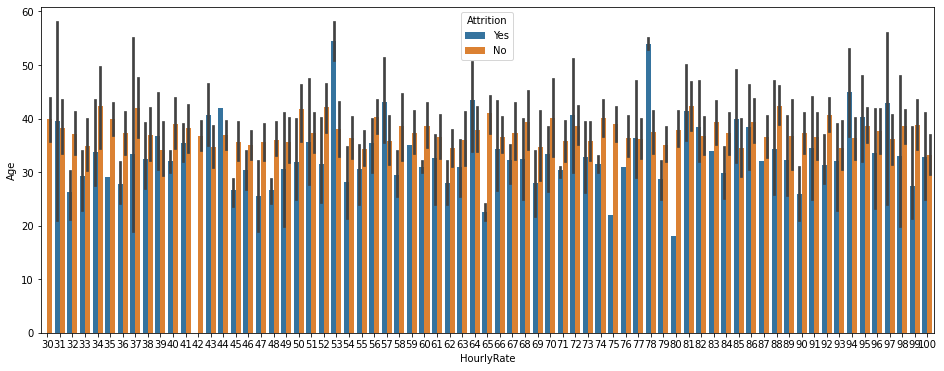

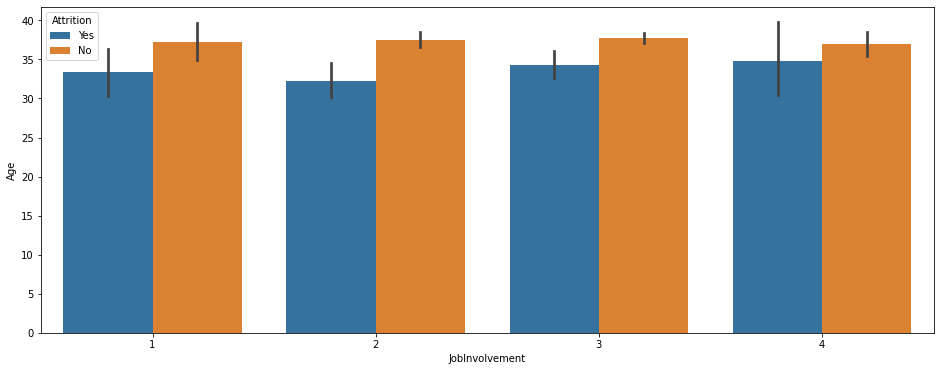

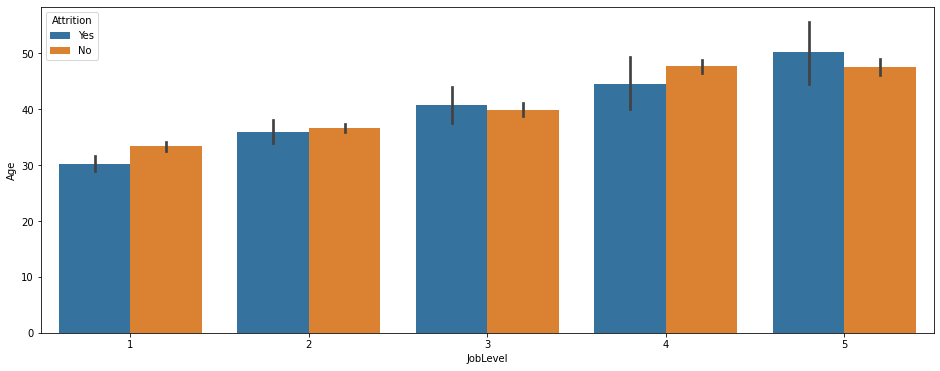

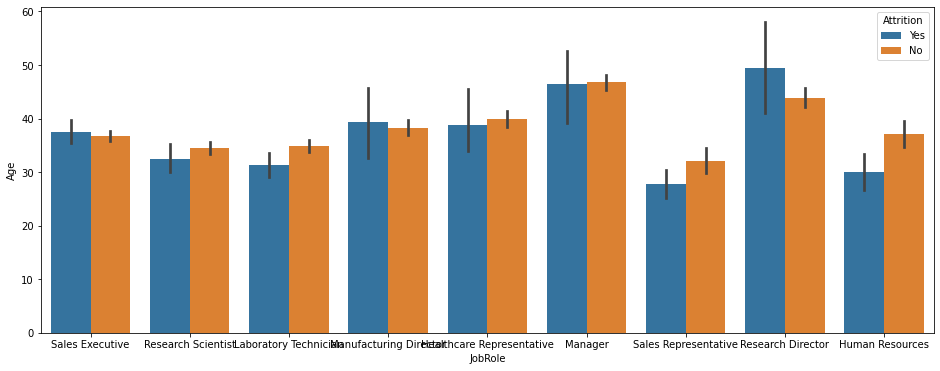

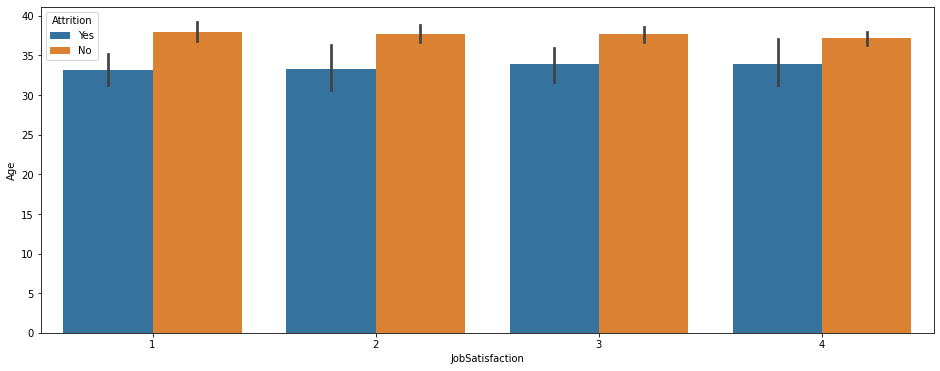

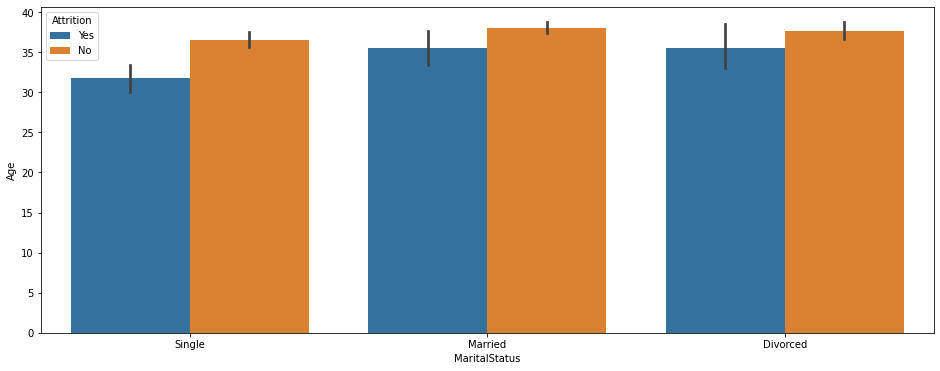

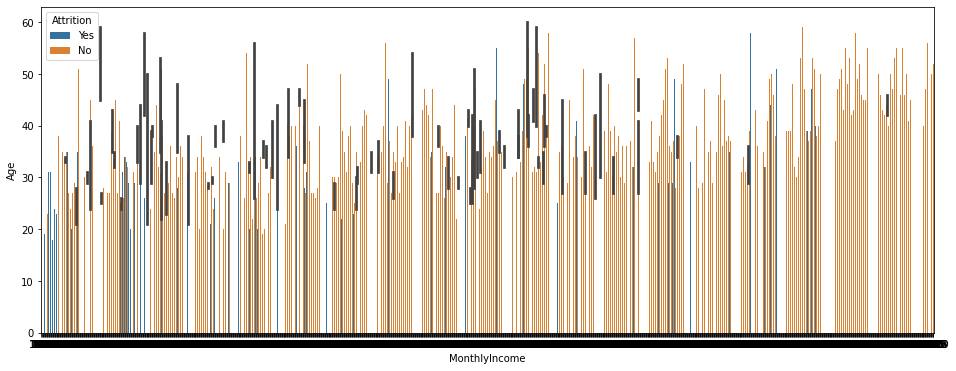

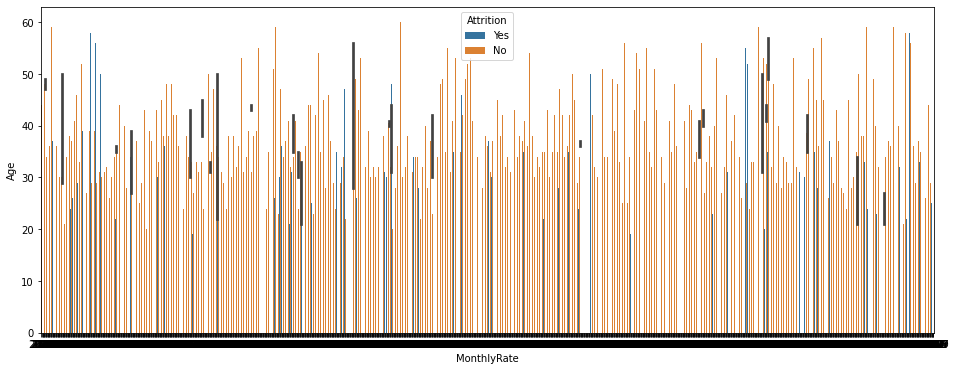

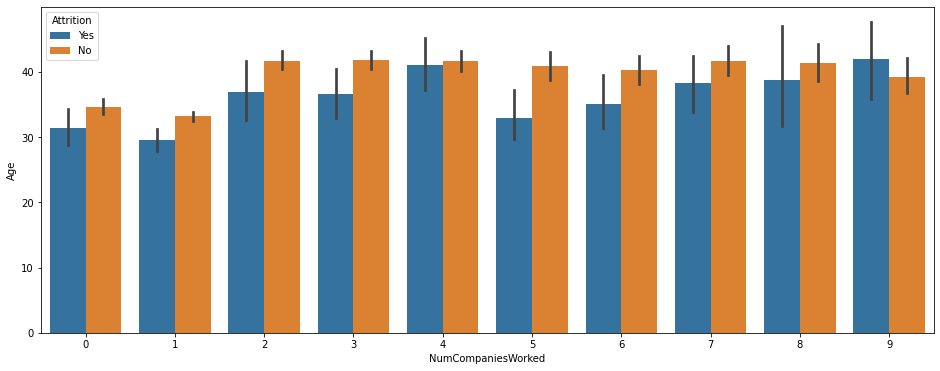

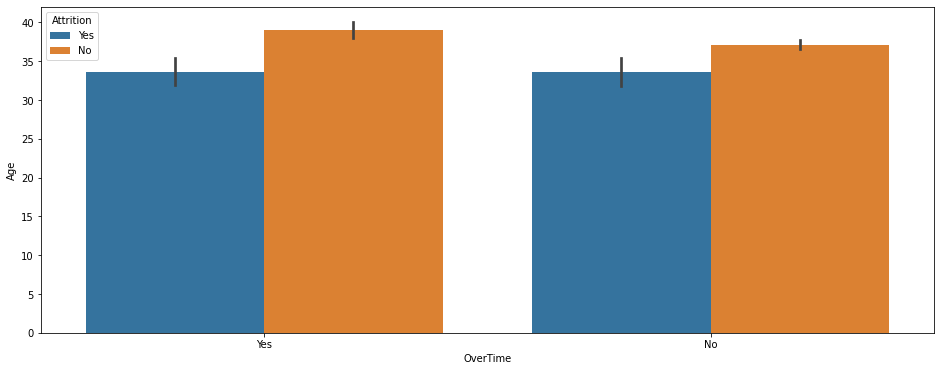

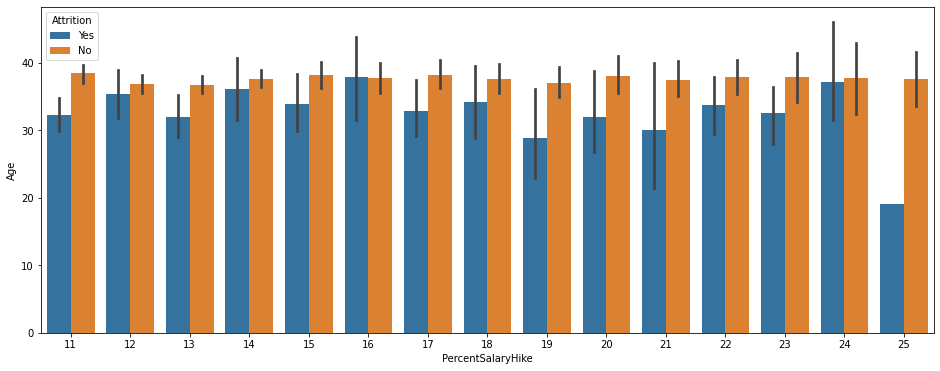

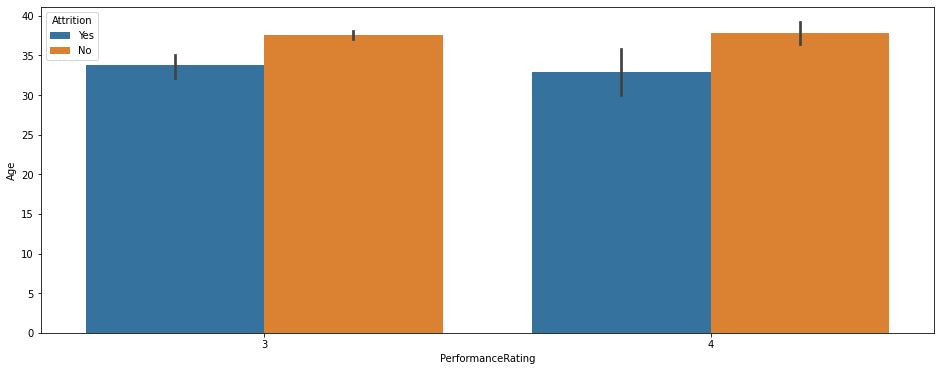

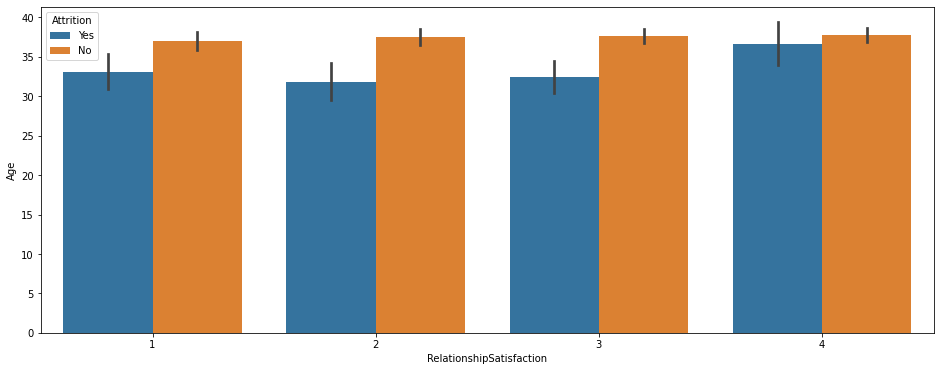

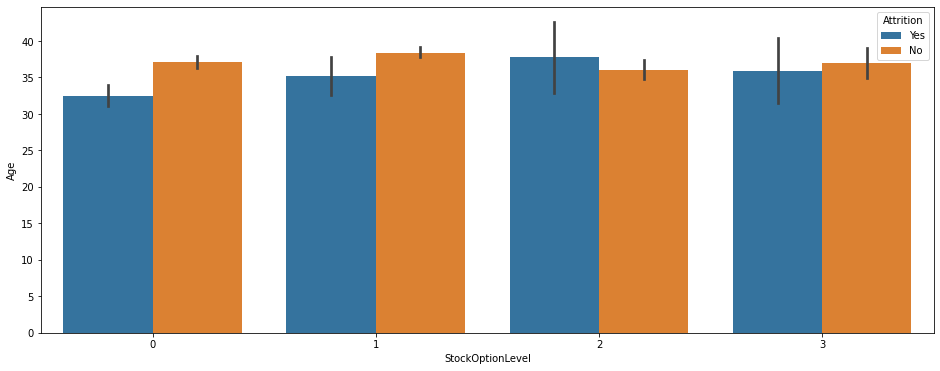

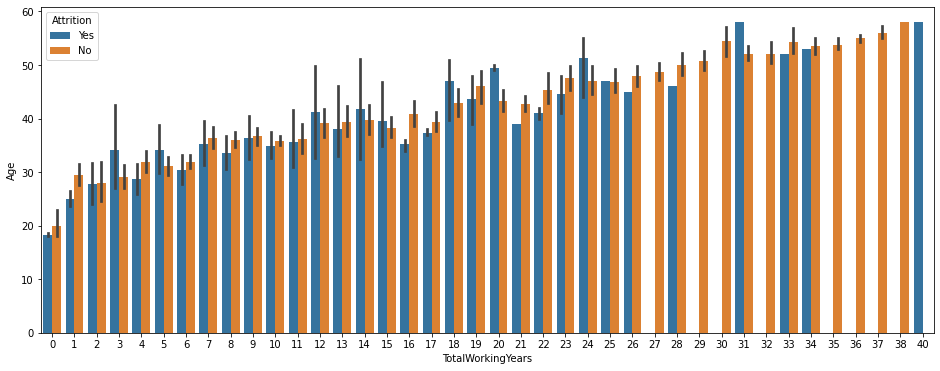

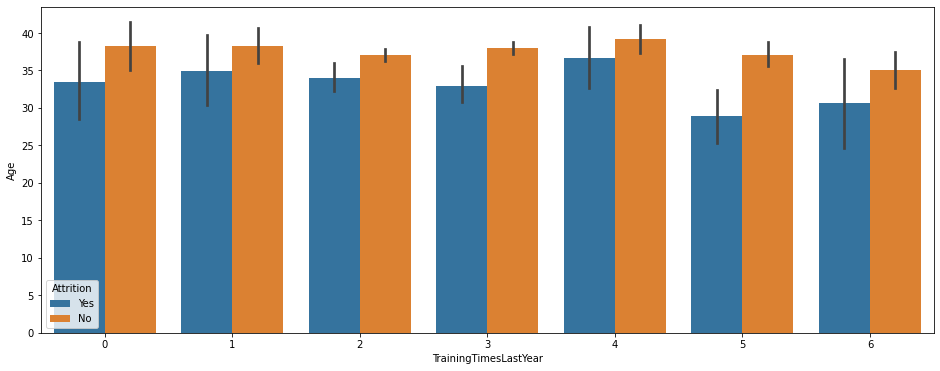

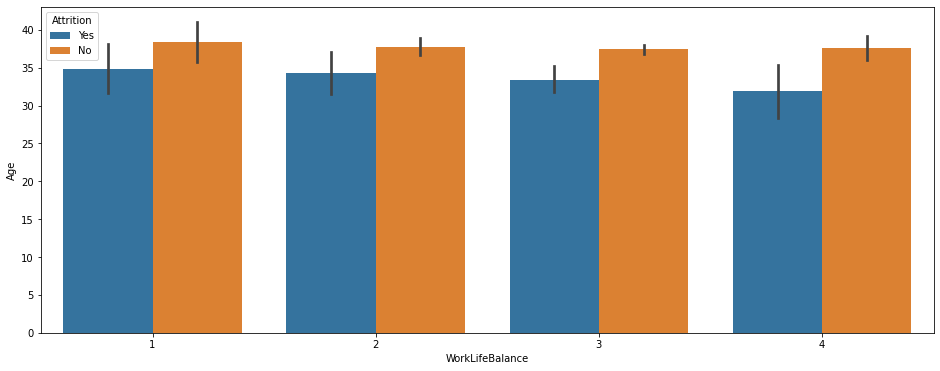

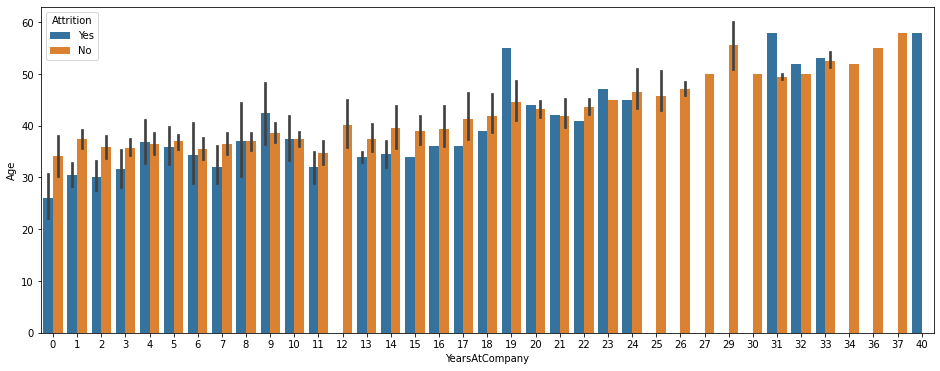

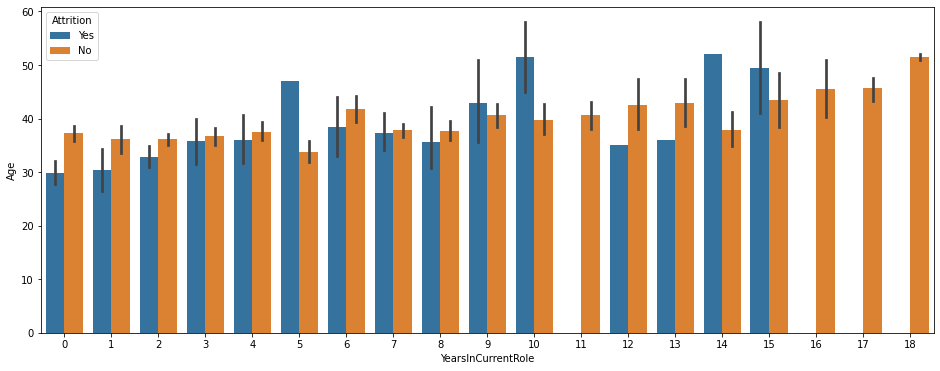

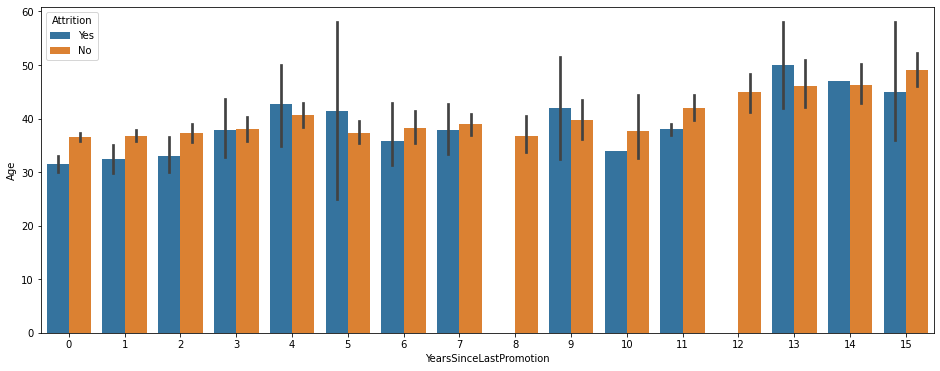

<Figure size 1152x432 with 0 Axes>

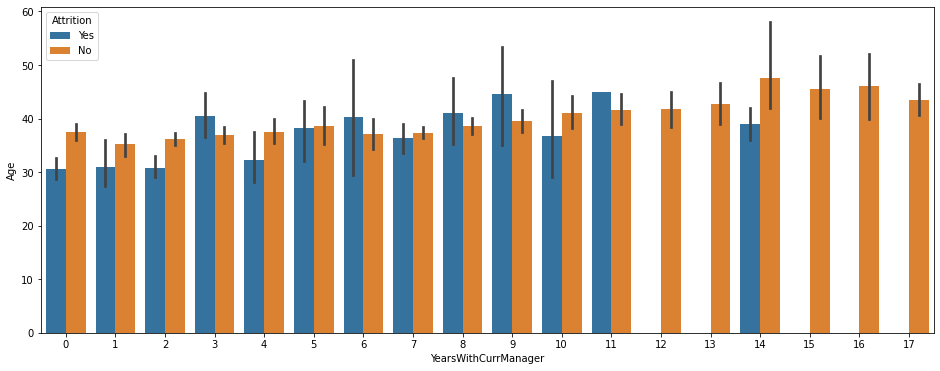

In [49]:
for i,cols in enumerate(df.columns[1:]):
    plt.figure(figsize=(16,6))
    plt.figure(i)
    sns.barplot(x = cols, y = 'Age', data = df, hue = 'Attrition', saturation = 0.7)

here are some of the observation we get from the above plot

# Encoding the dataframe

In [50]:
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1.0,2.0,1102,2.0,1,2,1.0,2,0.0,...,3,1,0,8,0,1,6,4,0,5
1,49,0.0,1.0,279,1.0,8,1,1.0,3,1.0,...,4,4,1,10,3,3,10,7,1,7
2,37,1.0,2.0,1373,1.0,2,2,4.0,4,1.0,...,3,2,0,7,3,3,0,0,0,0
3,33,0.0,1.0,1392,1.0,3,4,1.0,4,0.0,...,3,3,0,8,3,3,8,7,3,0
4,27,0.0,2.0,591,1.0,2,1,3.0,1,1.0,...,3,4,1,6,3,3,2,2,2,2


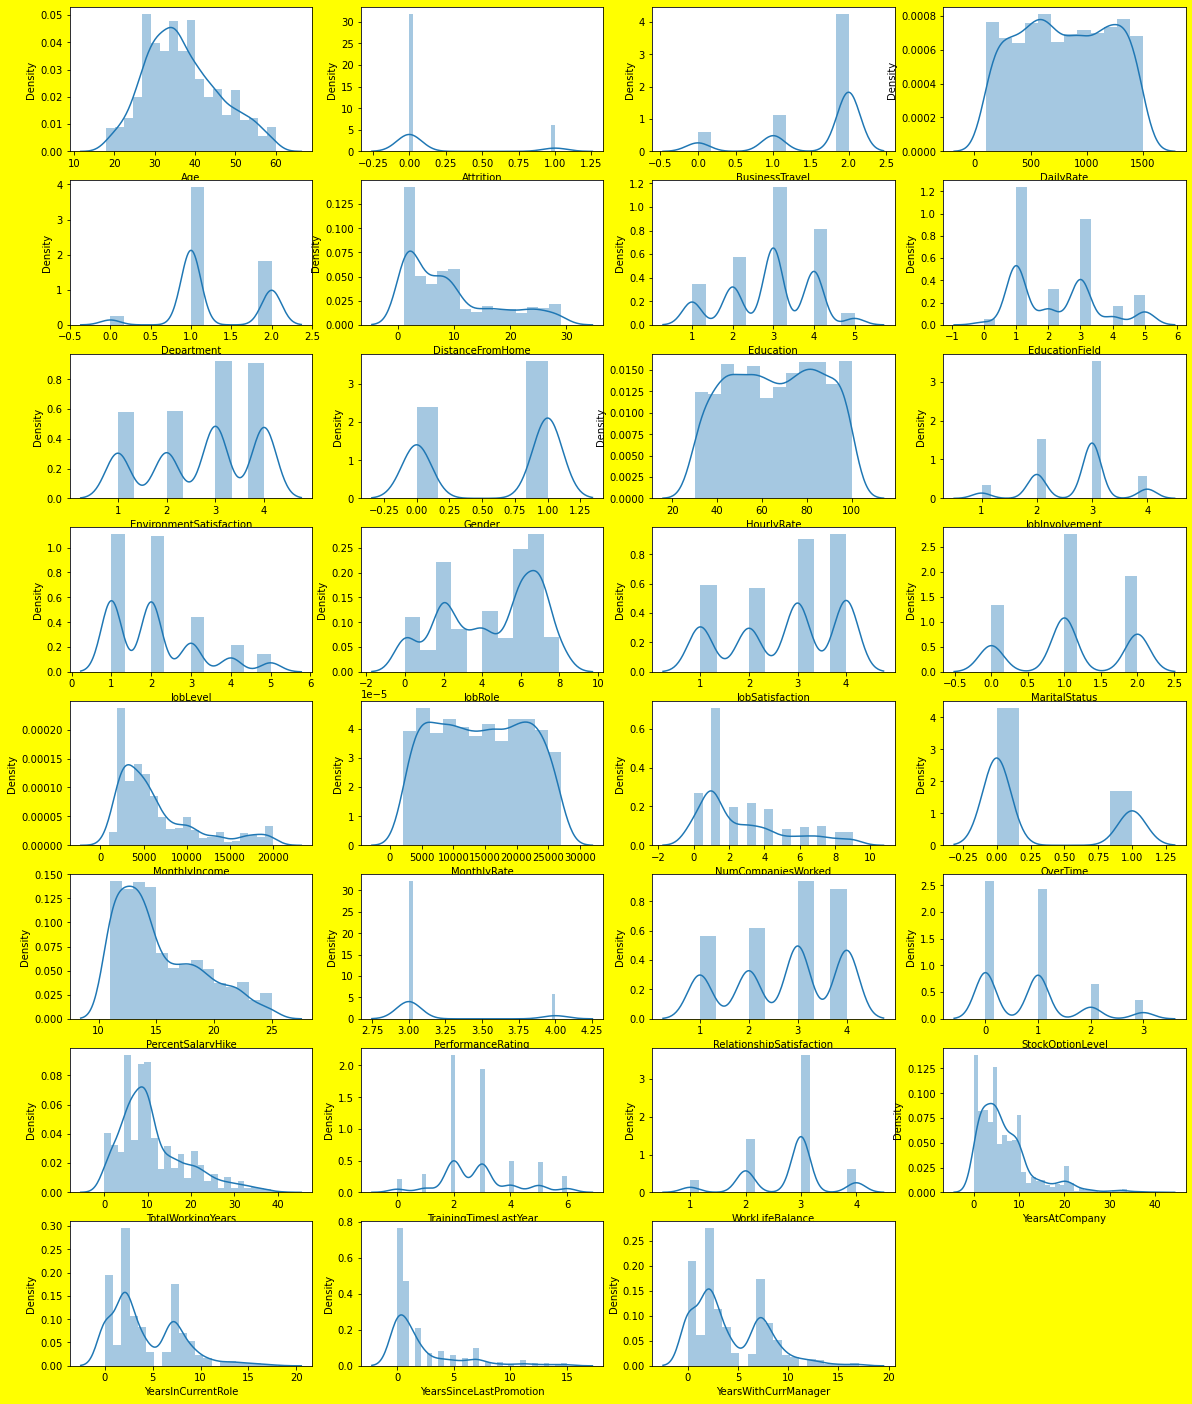

In [55]:
#lets see how our data point are distributed
plt.figure(figsize=(20,25),facecolor = 'yellow')
plotnumber = 1

for column in df:
    if plotnumber<=32:
        ax = plt.subplot(8,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
    
    plotnumber+=1 
plt.show() 

In [56]:
df.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
Y

In [57]:
# Splitting the independent and dependent columns

x = df.drop(['Attrition'], axis =1)
y = df['Attrition']

In [59]:
from sklearn.preprocessing import power_transform

df = power_transform(x)

df=pd.DataFrame(df, columns=x.columns)

df.skew()

Age                        -0.007603
BusinessTravel             -0.970506
DailyRate                  -0.196160
Department                  0.013801
DistanceFromHome           -0.007468
Education                  -0.099881
EducationField             -0.008386
EnvironmentSatisfaction    -0.205395
Gender                     -0.408665
HourlyRate                 -0.106461
JobInvolvement             -0.020365
JobLevel                    0.103624
JobRole                    -0.319659
JobSatisfaction            -0.212815
MaritalStatus              -0.156911
MonthlyIncome               0.000000
MonthlyRate                -0.184087
NumCompaniesWorked          0.014814
OverTime                    0.964489
PercentSalaryHike           0.116250
PerformanceRating           0.000000
RelationshipSatisfaction   -0.193634
StockOptionLevel            0.087019
TotalWorkingYears          -0.010653
TrainingTimesLastYear       0.058058
WorkLifeBalance            -0.012286
YearsAtCompany             -0.008683
Y

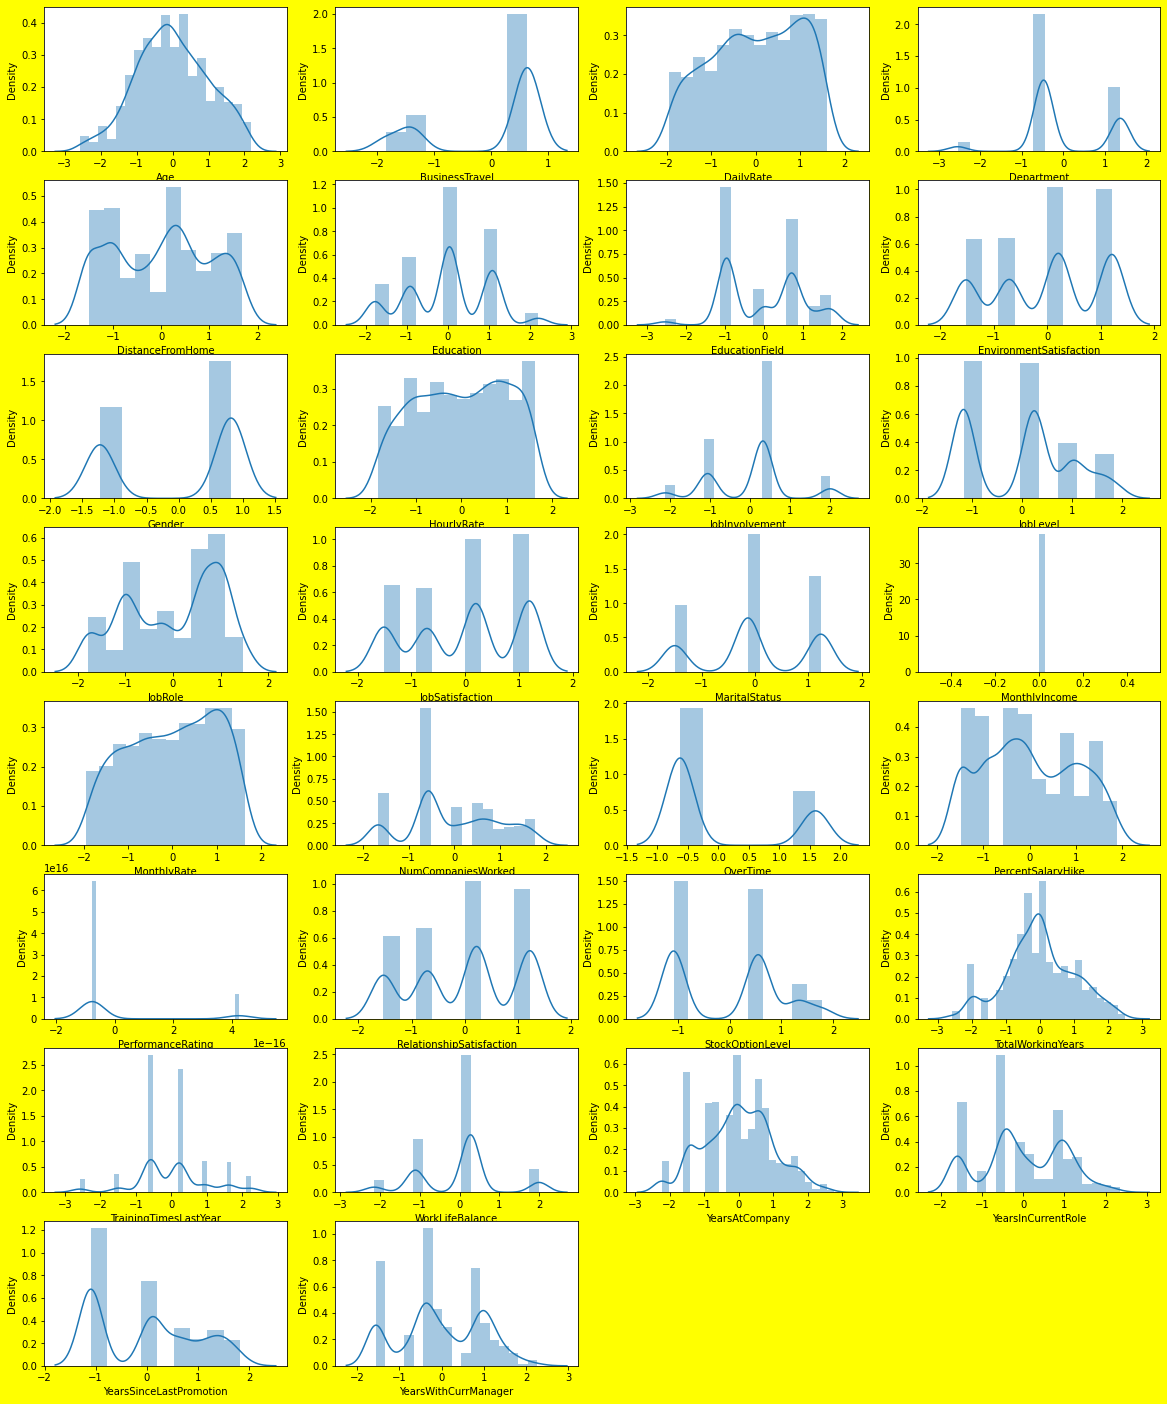

In [60]:
#lets see how our data point are distributed post removing skewness
plt.figure(figsize=(20,25),facecolor = 'yellow')
plotnumber = 1

for column in df:
    if plotnumber<=32:
        ax = plt.subplot(8,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
    
    plotnumber+=1 
plt.show() 

look like some of the feature contain outlier we will remove it

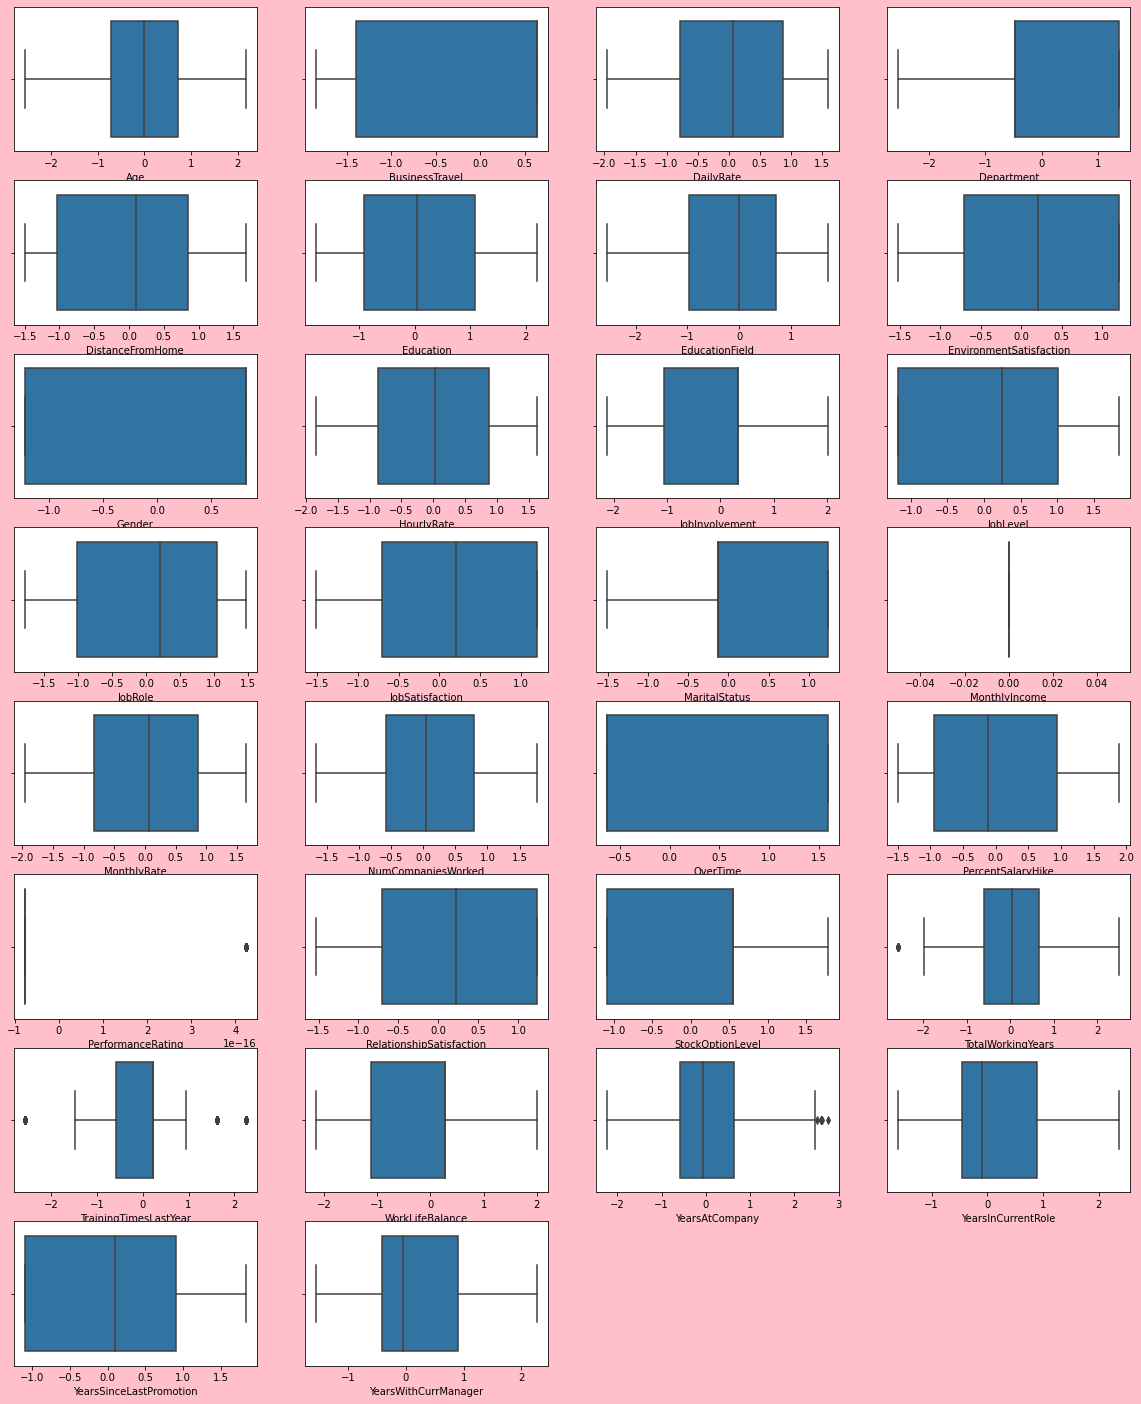

In [63]:
#Outlier checking

plt.figure(figsize=(20,25),facecolor = 'pink')
plotnumber = 1

for column in df:
    if plotnumber<=32:
        ax = plt.subplot(8,4,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column)
    
    plotnumber+=1 
plt.show() 

look like very few outlier present we can work onn this

<AxesSubplot:>

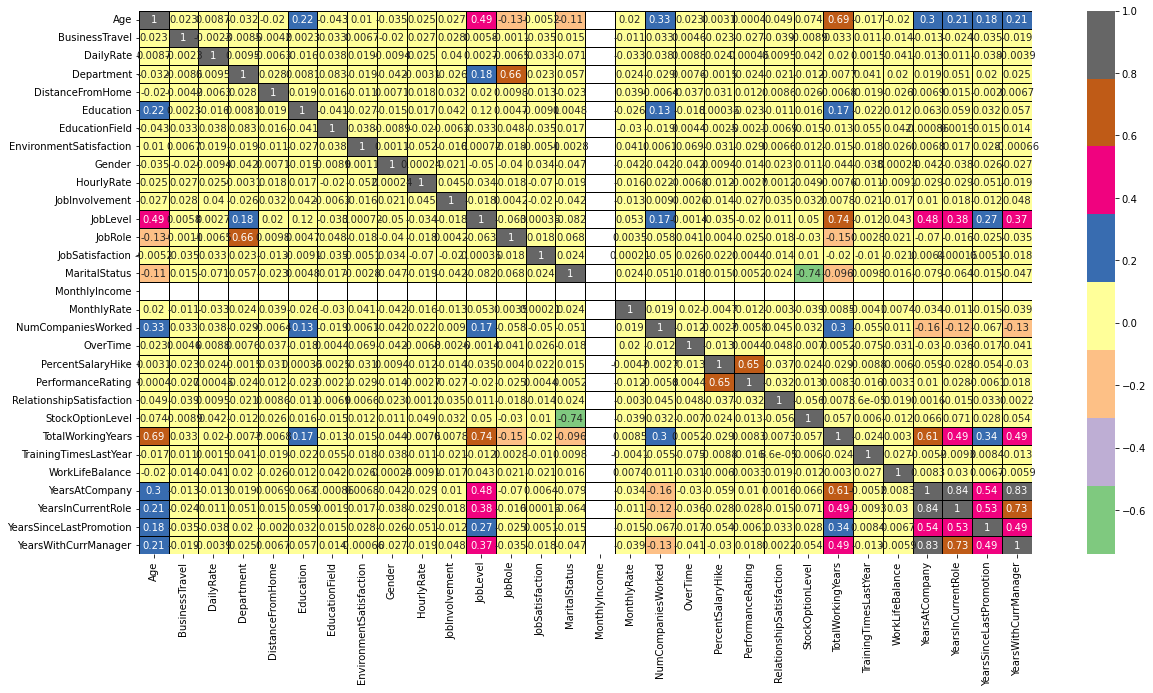

In [70]:
#Correlation Matrix
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot= True, linecolor='black',linewidths=0.5, cmap='Accent' )

We can see the positive and negative correlation with the target column.we are good to go

In [71]:
#Standard Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[ 0.4463504 ,  0.59004834,  0.74252653, ..., -0.0632959 ,
        -0.67914568,  0.24583399],
       [ 1.32236521, -0.91319439, -1.2977746 , ...,  0.76499762,
        -0.36871529,  0.80654148],
       [ 0.008343  ,  0.59004834,  1.41436324, ..., -1.16768726,
        -0.67914568, -1.15593471],
       ...,
       [-1.08667552,  0.59004834, -1.60518328, ..., -0.61549158,
        -0.67914568, -0.31487349],
       [ 1.32236521, -0.91319439,  0.54667746, ...,  0.48889978,
        -0.67914568,  1.08689522],
       [-0.32016256,  0.59004834, -0.43256792, ..., -0.33939374,
        -0.36871529, -0.59522723]])

In [73]:
#Handling imbalance data by over sampling:
from imblearn.over_sampling import SMOTE
Sm = SMOTE()
x, y = Sm.fit_resample(x,y)

In [75]:
y.value_counts()

1.0    1233
0.0    1233
Name: Attrition, dtype: int64

# Model Building

In [76]:
#Finding best random state:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
maxAccu = 0
maxRS = 0

for i in range (0,100):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predlr = LR.predict(x_test)
    acc = accuracy_score(y_test, predlr)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
        
print('The best accuracy is ',maxAccu, ' on Random_State ',maxRS)

The best accuracy is  0.8162162162162162  on Random_State  56


In [80]:
#Creating train_test Split:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30, random_state=56)

In [81]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# RandomForestClassifier

In [83]:
# checking accuracy for RandomForestclasifier
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC = RFC.predict(x_test)
print('Acurracy score is- ',accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))
score = cross_val_score(RFC,x,y)
print('cross vallidation sccore is - ',score)
print('CV mean score is - ', score.mean())
print("Difference between Accracy score and cross validation mean score is - ",accuracy_score(y_test,predRFC)-score.mean())

Acurracy score is-  0.9256756756756757
[[344  15]
 [ 40 341]]
              precision    recall  f1-score   support

         0.0       0.90      0.96      0.93       359
         1.0       0.96      0.90      0.93       381

    accuracy                           0.93       740
   macro avg       0.93      0.93      0.93       740
weighted avg       0.93      0.93      0.93       740

cross vallidation sccore is -  [0.79757085 0.97768763 0.97363083 0.97768763 0.97565923]
CV mean score is -  0.9404472329208102
Difference between Accracy score and cross validation mean score is -  -0.01477155724513457


# Support Vector Machine Classifier

In [84]:
svc = SVC()
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)
print('Acurracy score is- ',accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))
score = cross_val_score(svc,x,y)
print('cross validation score is- ',score)
print('cv mean score is - ', score.mean())
print("Difference between Accracy score and cross validation score is - ",accuracy_score(y_test,predsvc)-score.mean())

Acurracy score is-  0.927027027027027
[[328  31]
 [ 23 358]]
              precision    recall  f1-score   support

         0.0       0.93      0.91      0.92       359
         1.0       0.92      0.94      0.93       381

    accuracy                           0.93       740
   macro avg       0.93      0.93      0.93       740
weighted avg       0.93      0.93      0.93       740

cross validation score is-  [0.88461538 0.92900609 0.92494929 0.9127789  0.92494929]
cv mean score is -  0.9152597909190201
Difference between Accracy score and cross validation score is -  0.011767236108006895


# Gradient Boosting Classifier

In [85]:
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)
predGB = GB.predict(x_test)
print('Acurracy score is- ',accuracy_score(y_test,predGB))
print(confusion_matrix(y_test,predGB))
print(classification_report(y_test,predGB))
score = cross_val_score(GB,x,y)
print('cross validation score is- ',score)
print('CV mean score is - ', score.mean())
print("Difference between Accracy score and cross validation score is - ",accuracy_score(y_test,predGB)-score.mean())

Acurracy score is-  0.922972972972973
[[346  13]
 [ 44 337]]
              precision    recall  f1-score   support

         0.0       0.89      0.96      0.92       359
         1.0       0.96      0.88      0.92       381

    accuracy                           0.92       740
   macro avg       0.93      0.92      0.92       740
weighted avg       0.93      0.92      0.92       740

cross validation score is-  [0.58502024 0.97565923 0.97363083 0.96146045 0.96754564]
CV mean score is -  0.892663277791921
Difference between Accracy score and cross validation score is -  0.030309695181051977


# AdaBoost Classifier

In [86]:
ABC = AdaBoostClassifier()
ABC.fit(x_train,y_train)
predABC = ABC.predict(x_test)
print('Acurracy score is- ',accuracy_score(y_test,predABC))
print(confusion_matrix(y_test,predABC))
print(classification_report(y_test,predABC))

score = cross_val_score(ABC,x,y)
print('cross validation score is- ',score)
print('CV mean score is - ', score.mean())
print("Difference between Accracy score and cross validation score is - ",accuracy_score(y_test,predABC)-score.mean())

Acurracy score is-  0.9135135135135135
[[327  32]
 [ 32 349]]
              precision    recall  f1-score   support

         0.0       0.91      0.91      0.91       359
         1.0       0.92      0.92      0.92       381

    accuracy                           0.91       740
   macro avg       0.91      0.91      0.91       740
weighted avg       0.91      0.91      0.91       740

cross validation score is-  [0.62955466 0.93306288 0.9168357  0.92697769 0.94523327]
CV mean score is -  0.870332837867801
Difference between Accracy score and cross validation score is -  0.043180675645712485


# BaggingClassifier

In [87]:
BC = BaggingClassifier()
BC.fit(x_train,y_train)
predBC = BC.predict(x_test)
print('Acurracy score is- ',accuracy_score(y_test,predBC))
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test,predBC))

score = cross_val_score(BC,x,y)
print('cross validation score is- ',score)
print('CV mean score is - ', score.mean())
print("Difference between Accracy score and cross validation score is - ",accuracy_score(y_test,predBC)-score.mean())

Acurracy score is-  0.8824324324324324
[[336  23]
 [ 64 317]]
              precision    recall  f1-score   support

         0.0       0.84      0.94      0.89       359
         1.0       0.93      0.83      0.88       381

    accuracy                           0.88       740
   macro avg       0.89      0.88      0.88       740
weighted avg       0.89      0.88      0.88       740

cross validation score is-  [0.71255061 0.93914807 0.94726166 0.94320487 0.94929006]
CV mean score is -  0.8982910545203702
Difference between Accracy score and cross validation score is -  -0.015858622087937757


# Extra TreeClassifier

In [88]:
ET = ExtraTreesClassifier()
ET.fit(x_train,y_train)
predET = ET.predict(x_test)
print('Acurracy score is- ',accuracy_score(y_test,predET))
print(confusion_matrix(y_test, predET))
print(classification_report(y_test, predET))

score = cross_val_score(ET,x,y)
print('cross validation score is- ',score)
print('cv mean score is - ', score.mean())
print("Difference between Accracy score and cross validation score is - ",accuracy_score(y_test,predET)-score.mean())

Acurracy score is-  0.9594594594594594
[[344  15]
 [ 15 366]]
              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96       359
         1.0       0.96      0.96      0.96       381

    accuracy                           0.96       740
   macro avg       0.96      0.96      0.96       740
weighted avg       0.96      0.96      0.96       740

cross validation score is-  [0.93319838 0.97768763 0.97971602 0.97160243 0.98377282]
cv mean score is -  0.9691954570464233
Difference between Accracy score and cross validation score is -  -0.009735997586963863


# DecisionTreeClassifier

In [90]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
DT.fit(x_train,y_train)
predDT = DT.predict(x_test)
print('Acurracy score is- ',accuracy_score(y_test,predDT))
print(confusion_matrix(y_test,predDT))
print(classification_report(y_test,predDT))

score = cross_val_score(DT,x,y)
print('cross validation score is- ',score)
print('CV mean score is - ', score.mean())
print("Difference between Accracy score and cross validation score is - ",accuracy_score(y_test,predDT)-score.mean())

Acurracy score is-  0.8513513513513513
[[303  56]
 [ 54 327]]
              precision    recall  f1-score   support

         0.0       0.85      0.84      0.85       359
         1.0       0.85      0.86      0.86       381

    accuracy                           0.85       740
   macro avg       0.85      0.85      0.85       740
weighted avg       0.85      0.85      0.85       740

cross validation score is-  [0.70445344 0.87829615 0.87626775 0.87221095 0.88032454]
CV mean score is -  0.8423105665552555
Difference between Accracy score and cross validation score is -  0.009040784796095824


# KNeighborsClassifier

In [91]:
KNN=KNeighborsClassifier()
KNN.fit(x_train,y_train)
predKNN = KNN.predict(x_test)
print('Acurracy score is- ',accuracy_score(y_test,predKNN))
print(confusion_matrix(y_test,predKNN))
print(classification_report(y_test,predKNN))

score = cross_val_score(KNN,x,y)
print('cross validation score is- ',score)
print('CV mean score is - ', score.mean())
print("Difference between Accracy score and cross validation score is - ",accuracy_score(y_test,predKNN)-score.mean())

Acurracy score is-  0.8148648648648649
[[234 125]
 [ 12 369]]
              precision    recall  f1-score   support

         0.0       0.95      0.65      0.77       359
         1.0       0.75      0.97      0.84       381

    accuracy                           0.81       740
   macro avg       0.85      0.81      0.81       740
weighted avg       0.85      0.81      0.81       740

cross validation score is-  [0.79149798 0.8296146  0.82758621 0.79107505 0.80527383]
CV mean score is -  0.8090095342897733
Difference between Accracy score and cross validation score is -  0.005855330575091577


# Best Model

based on the above models we can see that differnce between accuracy score and cross val score is quite less in decision tree and accuracy is 85% so our best model is Decision tree

# Hyper parameter tuning

In [112]:
from sklearn.model_selection import GridSearchCV
DT = DecisionTreeClassifier()
dtc_para = {'criterion': ['gini','entropy'], 
            'splitter':['best','random'],
            'max_depth': [10,20,30,40,50],
            'min_samples_split': [2,4,6,8,10],
            }
dtc_tuning = GridSearchCV(estimator = DT, param_grid = dtc_para, cv=5)

dtc_tuning.fit(x_train,y_train)
dtc_tuning.best_params_

{'criterion': 'entropy',
 'max_depth': 30,
 'min_samples_split': 2,
 'splitter': 'best'}

In [115]:
FINAL_MODEL = DecisionTreeClassifier(criterion='entropy', max_depth=30,splitter='best',min_samples_split=2)
FINAL_MODEL.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=30)

In [116]:
finalmod_pred = FINAL_MODEL.predict(x_test)
finalmod_acc = (accuracy_score(y_test, finalmod_pred))*100
print("Accuracy score for the Best Model is:", finalmod_acc)

Accuracy score for the Best Model is: 85.4054054054054


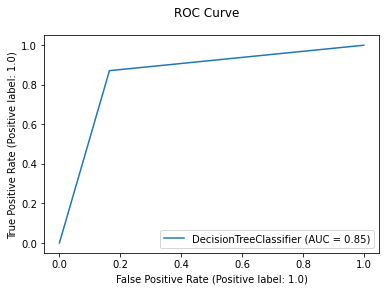

In [117]:
from sklearn import metrics
disp = metrics.plot_roc_curve(FINAL_MODEL,x_test,y_test)
disp.figure_.suptitle("ROC Curve")
plt.show()

# Saving the model

In [119]:
import pickle
filename = 'HR_analytics.pkl'
pickle.dump(FINAL_MODEL,open(filename,'wb'))#saved model

In [120]:
import pickle
loaded_model=pickle.load(open('HR_analytics.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

85.4054054054054
